In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('AirPassengers.csv')

In [3]:
df.head(50)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [4]:
df['Month']= pd.to_datetime(df['Month'])

In [5]:
from pandas.plotting import register_matplotlib_converters

In [6]:
register_matplotlib_converters

<function pandas.plotting._misc.register>

In [7]:
import matplotlib.pyplot as plt


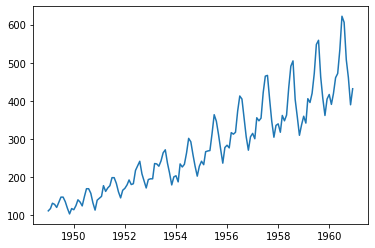

In [8]:
plt.plot(df["Month"], df['#Passengers'])

In [9]:
df.columns = ['ds', 'y']

In [10]:
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [11]:
treino = df[:100]
teste = df[100:]

In [12]:
from fbprophet import Prophet

In [13]:
m = Prophet()

In [14]:
m.fit(treino)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
modelo = m.make_future_dataframe(periods = 1250)

In [16]:
previsao = m.predict(modelo)

In [17]:
previsao.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,110.704038,77.798232,110.146162,110.704038,110.704038,-16.407275,-16.407275,-16.407275,-16.407275,-16.407275,-16.407275,0.0,0.0,0.0,94.296763
1,1949-02-01,112.750300,73.285053,106.641876,112.750300,112.750300,-22.179179,-22.179179,-22.179179,-22.179179,-22.179179,-22.179179,0.0,0.0,0.0,90.571121
2,1949-03-01,114.598537,106.554115,138.966368,114.598537,114.598537,8.041529,8.041529,8.041529,8.041529,8.041529,8.041529,0.0,0.0,0.0,122.640066
3,1949-04-01,116.644799,98.409805,132.012290,116.644799,116.644799,-0.844058,-0.844058,-0.844058,-0.844058,-0.844058,-0.844058,0.0,0.0,0.0,115.800741
4,1949-05-01,118.625053,97.432816,132.003007,118.625053,118.625053,-3.596538,-3.596538,-3.596538,-3.596538,-3.596538,-3.596538,0.0,0.0,0.0,115.028515


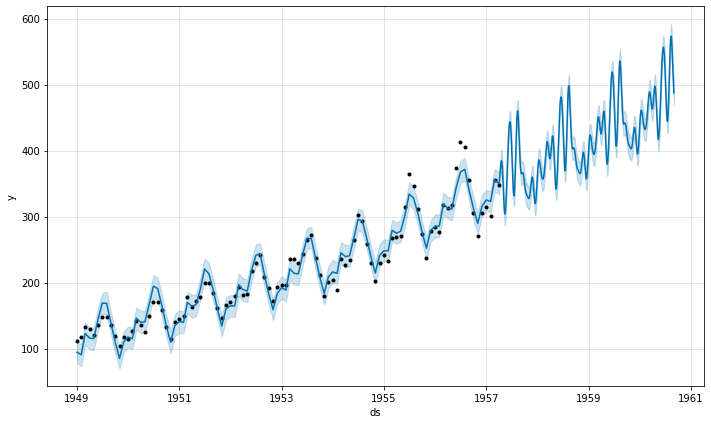

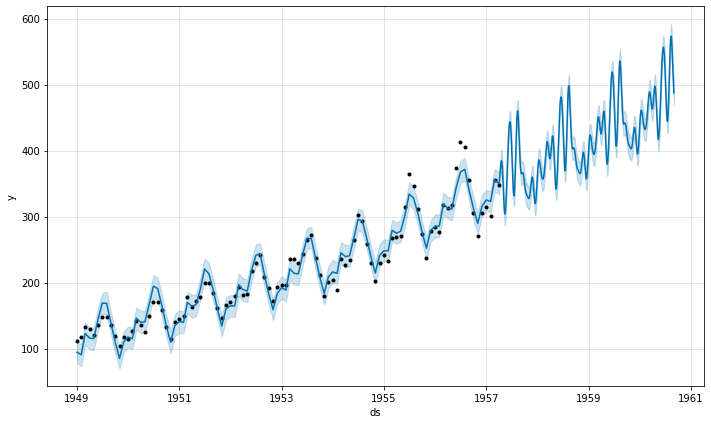

In [18]:
m.plot(previsao)

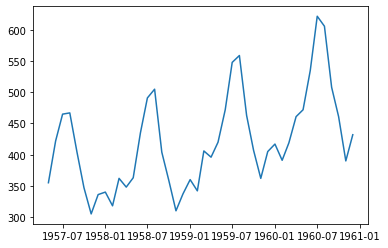

In [19]:
plt.plot(teste['ds'], teste['y'])

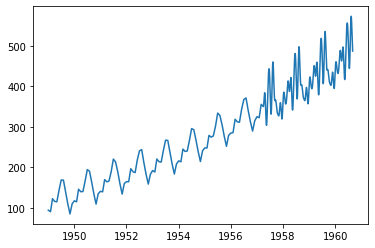

In [20]:
plt.plot(previsao['ds'], previsao['yhat'])